<a href="https://colab.research.google.com/github/mnourb/appI/blob/main/Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Constants
G_F = 1.1663787e-5  # Fermi constant in GeV^-2
m_t = 172.76  # Top quark mass in GeV
m_b = 4.18  # Bottom quark mass in GeV
M_W = 80.379  # W boson mass in GeV
V_tb = 0.999  # CKM matrix element

In [4]:
# Functions
def lambda_function(a, b, c):
   return (a**2 - (b + c)**2) * (a**2 - (b - c)**2)

def I(x, y):
   return ((1 - x**2) * (1 + 2 * x**2) - y**2 * (2 - x**2 - y**2)) * np.sqrt(lambda_function(1, x, y))

def J(x, y, t_beta):
   return ((1 / t_beta**2 + y**2 * t_beta**2) * (1 + y**2 - x**2) + 4 * y**2) * np.sqrt(lambda_function(1, x, y))

# Decay widths
def gamma_Wb():
   return (G_F * m_t**3 / (8 * np.pi * np.sqrt(2))) * V_tb**2 * I(M_W / m_t, m_b / m_t)

def gamma_Hb(m_H, tan_beta):
   return (G_F * m_t**3 / (8 * np.pi * np.sqrt(2))) * V_tb**2 * J(m_H / m_t, m_b / m_t, tan_beta)

# Branching ratio
def branching_fraction(m_H, tan_beta):
   gamma_Wb_val = gamma_Wb()
   gamma_Hb_val = gamma_Hb(m_H, tan_beta)
   return gamma_Wb_val / (gamma_Wb_val + gamma_Hb_val)

<ipython-input-4-98762a09554d>:9: RuntimeWarning: invalid value encountered in sqrt
  return ((1 / t_beta**2 + y**2 * t_beta**2) * (1 + y**2 - x**2) + 4 * y**2) * np.sqrt(lambda_function(1, x, y))


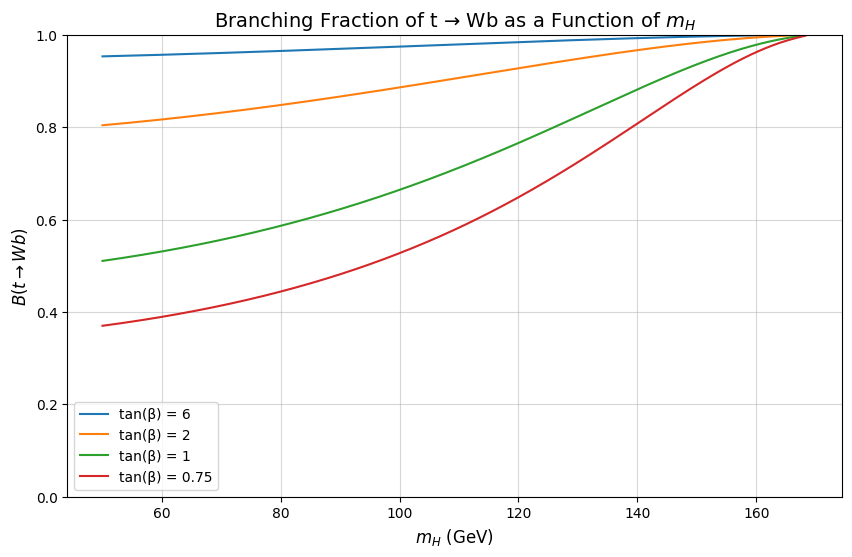

In [13]:
# Parameters for the plot
m_H_values = np.linspace(50, 170, 500)  # Higgs mass range from 50 to 180 GeV
tan_beta_values = [6, 2, 1, 0.75]  # Different values of tan(beta)

# Plotting
plt.figure(figsize=(10, 6))
for tan_beta in tan_beta_values:
   branching_ratios = [branching_fraction(m_H, tan_beta) for m_H in m_H_values]
   plt.plot(m_H_values, branching_ratios, label=f"tan(β) = {tan_beta}")

plt.title(r"Branching Fraction of t → Wb as a Function of $m_H$", fontsize=14)
plt.xlabel(r"$m_H$ (GeV)", fontsize=12)
plt.ylabel(r"$B(t \rightarrow W b)$", fontsize=12)
plt.ylim(0, 1)
plt.legend()
plt.grid(alpha=0.5)
plt.show()